In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
import yfinance as yf
import pandas_datareader as pdr

In [3]:
data = {}
start_date = '2020-01-01'
end_date = '2020-12-31'

In [4]:
data['VTI'] = yf.download('VTI', period='max')
data['VTV'] = yf.download('VTV', period='max')
data['VOE'] = yf.download('VOE', period='max')
data['VBR'] = yf.download('VBR', period='max')
data['GBIL'] = yf.download('GBIL', period='max')
data['JPST'] = yf.download('JPST', period='max')
data['VNQ'] = yf.download('VNQ', period='max')
data['VPU'] = yf.download('VPU', period='max')
#data['BITO'] = yf.download('BITO', period='max')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
for ticker in data:
    data[ticker] = data[ticker].dropna()
    data[ticker] = data[ticker][start_date:end_date]

In [6]:
for ticker in data:
    data[ticker]['percentageChange'] = data[ticker]['Close'].pct_change()*10
    data[ticker]['percentageChange'] = data[ticker]['percentageChange'].fillna(0)

<AxesSubplot:xlabel='Date'>

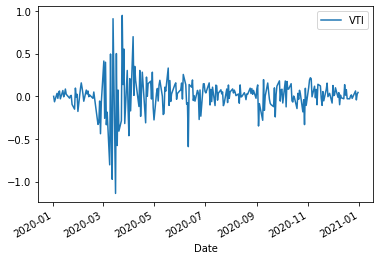

In [8]:
data['VTI'].plot(y='percentageChange', label='VTI')

In [9]:
cov_matrix = np.cov(data['VTI']['percentageChange'], data['VTV']['percentageChange'])

In [10]:
cov_matrix

array([[0.04629786, 0.04569348],
       [0.04569348, 0.04869017]])

In [11]:
onlyClosePrices = pd.DataFrame()

In [12]:
for ticker in data:
    onlyClosePrices[ticker] = data[ticker]['Close']

In [15]:
onlyClosePrices.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [20]:
S = pypfopt.risk_models.CovarianceShrinkage(onlyClosePrices).ledoit_wolf()

In [82]:
netAssets = {}
for ticker in data:
    netAssets[ticker] = yf.Ticker(ticker).info['totalAssets']

In [84]:
netAssets['VTI']

1200912072704

In [88]:
netAssets = list(netAssets.values())

In [91]:
delta = pypfopt.black_litterman.market_implied_risk_aversion(pd.Series(netAssets), risk_free_rate=0.05796)

In [92]:
delta

0.1074068194437139

In [94]:
from keras.models import load_model

In [95]:
model = load_model('VTI.h5')

In [96]:
model